Text(0.5, 0, 'Units Sold')

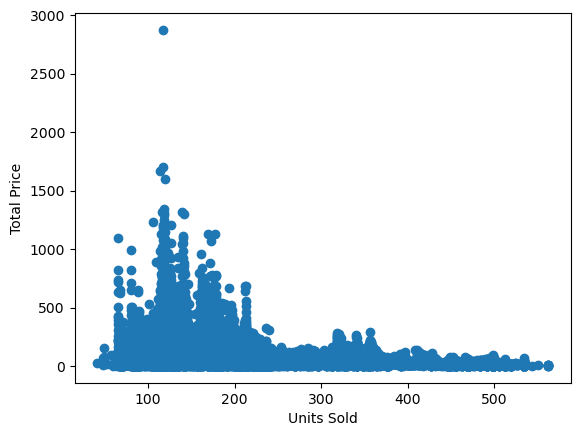

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('demand.csv')
plt.plot(data['Total Price'],data['Units Sold'],'o')
plt.ylabel('Total Price')
plt.xlabel('Units Sold')

Text(0.5, 0, 'Units Sold')

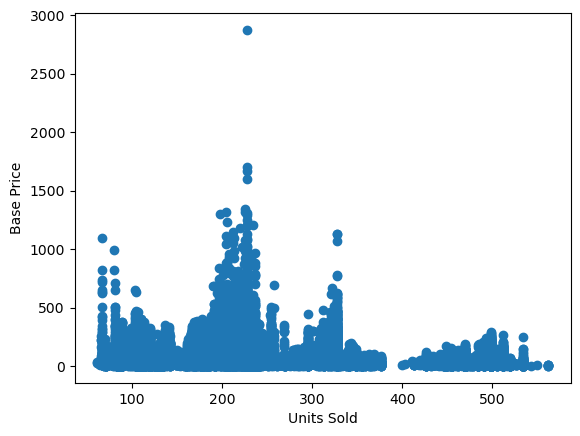

In [2]:
plt.plot(data['Base Price'],data['Units Sold'],'o')
plt.ylabel('Base Price')
plt.xlabel('Units Sold')

In [3]:
from LinearRegression import LinearRegression
from SupportVectorMachine import SVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
import pickle


def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)
data = clean_dataset(data)
X = data[['Total Price','Base Price']]
y =  data['Units Sold']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)
model = LinearRegression(lr = 0.00001,n_iters=1000)
mod = SVM(learning_rate=0.000001,n_iters=10)
model.fit(np.array(X_train),np.array(y_train))
mod.fit(np.array(X_train),np.array(y_train))

prediction = model.predict(np.array(X_test))
y_pred = mod.predict(np.array(X_test))
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print(mean_absolute_error(np.array(y_test),prediction))
print(mean_absolute_error(np.array(y_test),y_pred))

38.28574965196033
50.91538461538462


In [4]:
p_val = [240,300]
prediction = model.predict([p_val])
y_pred = mod.predict([p_val])
print(f"Around {int(prediction)} units sold using our model")
print(f"Around {int(y_pred)} units sold using SVM")

Around 72 units sold using our model
Around 1 units sold using SVM
